# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
# pd.options.plotting.backend  = "plotly"

# LOAD DATASET

In [2]:
trainset = pd.read_csv('data/cleaned_df_train.csv')

In [3]:
trainset

,Unnamed: 0,ID,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other relition,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Target
0,0,1,33,1,3,2,8,0,5,1,...,0,0,0,1,0,0,0,0,0,0
1,1,2,37,1,2,2,8,1,4,1,...,0,0,0,1,0,0,0,0,0,0
2,2,3,37,1,2,2,8,0,4,2,...,0,0,0,1,0,0,0,0,0,0
3,3,4,9,1,3,3,3,2,3,2,...,0,0,0,1,0,0,0,0,0,0
4,4,5,40,1,4,2,10,1,4,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5817,5818,36,1,1,2,8,0,6,1,...,0,0,0,1,0,0,0,0,0,0
5818,5818,5819,35,1,4,4,8,1,4,1,...,0,0,0,1,0,0,0,0,0,0
5819,5819,5820,33,1,3,4,8,0,6,0,...,0,0,0,1,0,0,0,0,0,1
5820,5820,5821,34,1,3,2,8,0,7,0,...,0,0,0,0,0,0,0,0,0,0


# SPLIT DATA

In [4]:
# train, validation = train_test_split(trainset, train_size=0.7, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(trainset.iloc[:,2:-1], trainset.iloc[:,-1], train_size=0.75, shuffle=True)

In [8]:
# X_train, y_train = train[list(train.columns)[2:-1]], train['Target']
# X_test, y_test = validation[list(validation.columns)[2:-1]], train['Target']
selected_feat = ['Customer Subtype', 'Customer main type', 'Protestant',
       'Other relition', 'No religion', 'Married', 'Other relation', 'Singles',
       'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Middle management',
       'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Average income',
       'Purchasing power class', 'Contribution private third party insurance',
       'Contribution car policies', 'Contribution fire policies',
       'Number of private third party insurance', 'Number of car policies',
       'Number of fire policies']
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
X_us, y_us = us.fit_resample(X_train, y_train)
os=RandomOverSampler()
X_os, y_os = os.fit_resample(X_train, y_train)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_res)
X_test_pca = pca.transform(X_test)

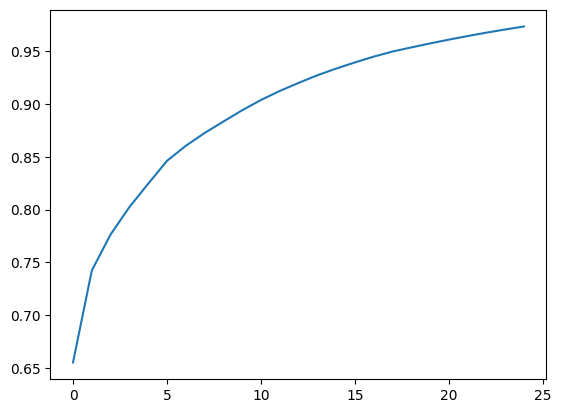

In [11]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.plot(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label='Cumulative explained variance')

## Apply PCA for 3 samples

In [52]:
pca_5 = PCA(n_components=5)
X_train_pca_5 = pca_5.fit_transform(X_res)
X_test_pca_5 = pca_5.transform(X_test)
pca_10 = PCA(n_components=10)
X_train_pca_10 = pca_10.fit_transform(X_res)
X_test_pca_10 = pca_10.transform(X_test)
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_res)
X_test_pca_2 = pca_2.transform(X_test)


In [53]:
X_train_pca.shape

(8200, 25)

# SVC

## WIHOUT PCA

In [10]:
svc = SVC()
svc.fit(X_res[selected_feat], y_res)
y_pred = svc.predict(X_test[selected_feat])

In [11]:
roc_auc_score(y_test, y_pred)

0.5324936982994284

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1374
           1       0.20      0.09      0.12        82

    accuracy                           0.93      1456
   macro avg       0.57      0.53      0.54      1456
weighted avg       0.91      0.93      0.92      1456



In [13]:
svc = SVC()
svc.fit(X_train_pca_10, y_res)
y_pred = svc.predict(X_test_pca_10)

In [14]:
roc_auc_score(y_test, y_pred)

0.5866883232151099

In [15]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      1374
           1       0.09      0.44      0.15        82

    accuracy                           0.72      1456
   macro avg       0.52      0.59      0.49      1456
weighted avg       0.91      0.72      0.79      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


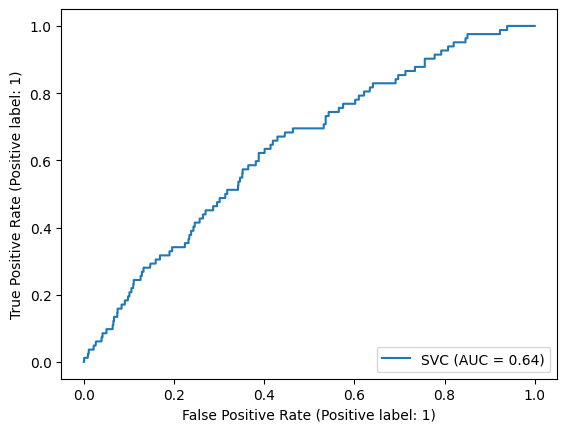

In [16]:
plot_roc_curve(svc, X_test_pca_10, y_test)

In [17]:
svc = SVC()
svc.fit(X_train_pca_5, y_res)
y_pred = svc.predict(X_test_pca_5)

In [18]:
roc_auc_score(y_test, y_pred)

0.6063567295061597

In [19]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79      1374
           1       0.09      0.54      0.15        82

    accuracy                           0.67      1456
   macro avg       0.53      0.61      0.47      1456
weighted avg       0.91      0.67      0.76      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


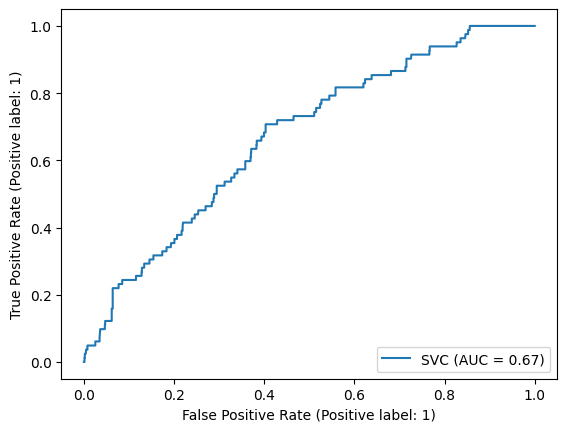

In [20]:
plot_roc_curve(svc, X_test_pca_5, y_test)

# LBGMClassifier

In [21]:
lgb = LGBMClassifier()
lgb.fit(X_res[selected_feat], y_res)
y_pred = lgb.predict(X_test[selected_feat])

In [22]:
roc_auc_score(y_test, y_pred)

0.5370468988532681

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1374
           1       0.16      0.11      0.13        82

    accuracy                           0.92      1456
   macro avg       0.55      0.54      0.54      1456
weighted avg       0.90      0.92      0.91      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


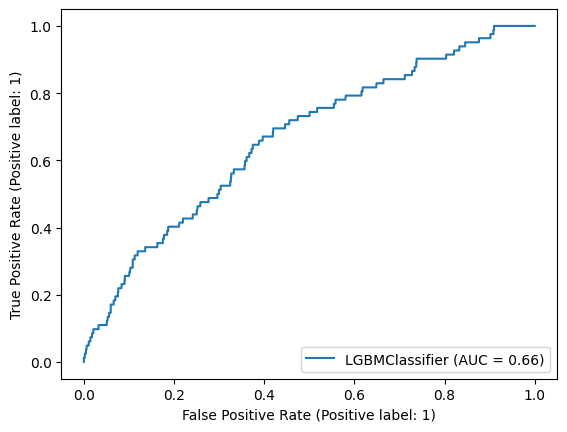

In [24]:
plot_roc_curve(lgb, X_test[selected_feat], y_test)

In [25]:
lgb_ = LGBMClassifier()
lgb_.fit(X_train_pca_5, y_res)
y_pred = lgb_.predict(X_test_pca_5)
# svc = SVC()
# svc.fit(X_train_pca, y_res)
# y_pred = svc.predict(X_test_pca)

In [26]:
roc_auc_score(y_test, y_pred)

0.6145223133454042

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1374
           1       0.12      0.41      0.18        82

    accuracy                           0.79      1456
   macro avg       0.54      0.61      0.53      1456
weighted avg       0.91      0.79      0.84      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


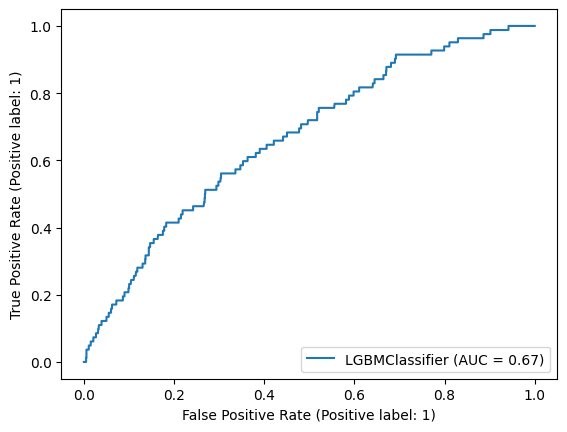

In [28]:
plot_roc_curve(lgb_, X_test_pca_5, y_test)

In [29]:
lgb_ = LGBMClassifier()
lgb_.fit(X_train_pca_10, y_res)
y_pred = lgb_.predict(X_test_pca_10)
# svc = SVC()
# svc.fit(X_train_pca, y_res)
# y_pred = svc.predict(X_test_pca)

In [30]:
roc_auc_score(y_test, y_pred)

0.5685554017112223

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1374
           1       0.10      0.28      0.15        82

    accuracy                           0.82      1456
   macro avg       0.53      0.57      0.53      1456
weighted avg       0.90      0.82      0.86      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


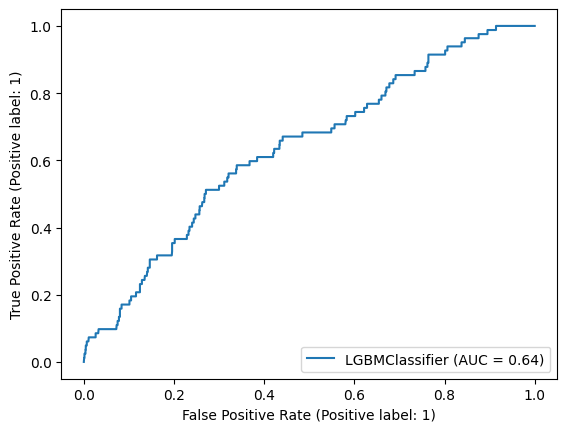

In [32]:
plot_roc_curve(lgb_, X_test_pca_10, y_test)

# Logistic

In [33]:
lr = LogisticRegression()
lr.fit(X_res[selected_feat], y_res)
y_pred = lr.predict(X_test[selected_feat])

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [34]:
roc_auc_score(y_test, y_pred)

0.6167057194589413

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1374
           1       0.12      0.41      0.19        82

    accuracy                           0.80      1456
   macro avg       0.54      0.62      0.53      1456
weighted avg       0.91      0.80      0.84      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


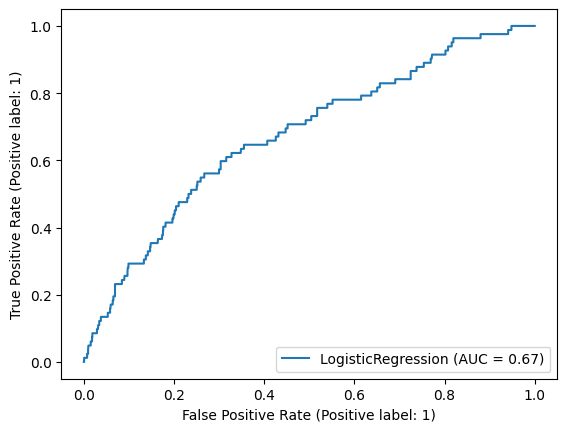

In [36]:
plot_roc_curve(lr, X_test[selected_feat], y_test)

In [37]:
lr_10 = LogisticRegression()
lr_10.fit(X_train_pca_10, y_res)
y_pred = lr_10.predict(X_test_pca_10)
# svc = SVC()
# svc.fit(X_train_pca, y_res)
# y_pred = svc.predict(X_test_pca)

In [38]:
roc_auc_score(y_test, y_pred)

0.6161021763056059

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.63      0.77      1374
           1       0.09      0.60      0.15        82

    accuracy                           0.63      1456
   macro avg       0.53      0.62      0.46      1456
weighted avg       0.91      0.63      0.73      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


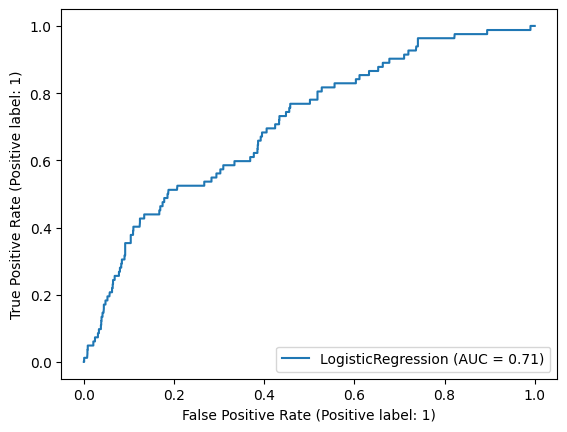

In [40]:
plot_roc_curve(lr_10, X_test_pca_10, y_test)

In [41]:
lr_5 = LogisticRegression()
lr_5.fit(X_train_pca_5, y_res)
y_pred = lr_5.predict(X_test_pca_5)
# svc = SVC()
# svc.fit(X_train_pca, y_res)
# y_pred = svc.predict(X_test_pca)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76      1374
           1       0.10      0.66      0.17        82

    accuracy                           0.63      1456
   macro avg       0.53      0.64      0.46      1456
weighted avg       0.92      0.63      0.73      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


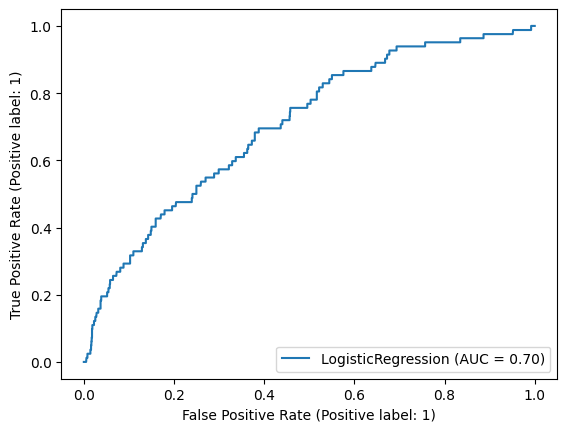

In [43]:
plot_roc_curve(lr_5, X_test_pca_5, y_test)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_res[selected_feat], y_res)
y_pred = lda.predict(X_test[selected_feat])

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1376
           1       0.17      0.05      0.08        80

    accuracy                           0.93      1456
   macro avg       0.56      0.52      0.52      1456
weighted avg       0.90      0.93      0.92      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


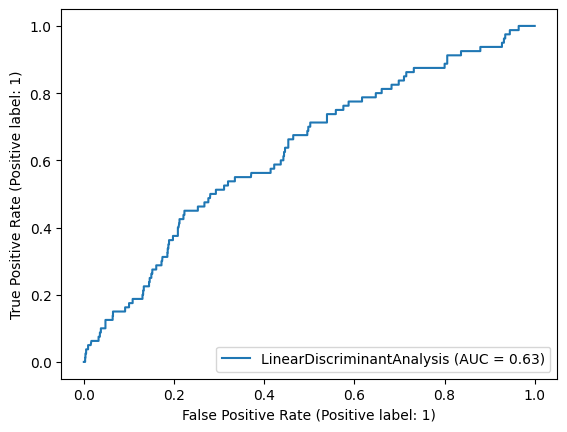

In [13]:
plot_roc_curve(lda, X_test[selected_feat], y_test)

In [14]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca_10, y_res)
y_pred = lda.predict(X_test_pca_10)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77      1376
           1       0.08      0.54      0.14        80

    accuracy                           0.63      1456
   macro avg       0.52      0.59      0.45      1456
weighted avg       0.91      0.63      0.73      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


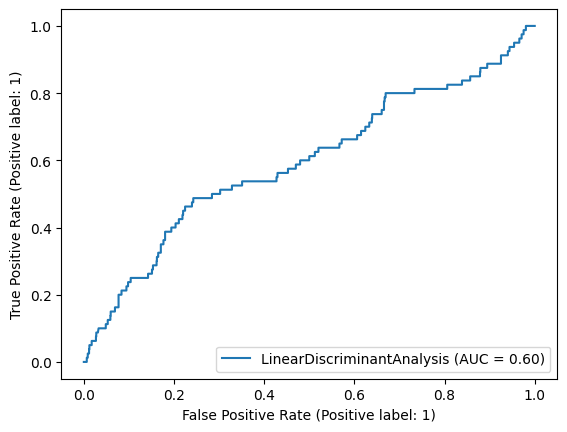

In [16]:
plot_roc_curve(lda, X_test_pca_10, y_test)

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca_5, y_res)
y_pred = lda.predict(X_test_pca_5)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78      1376
           1       0.10      0.64      0.17        80

    accuracy                           0.65      1456
   macro avg       0.53      0.64      0.47      1456
weighted avg       0.92      0.65      0.74      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


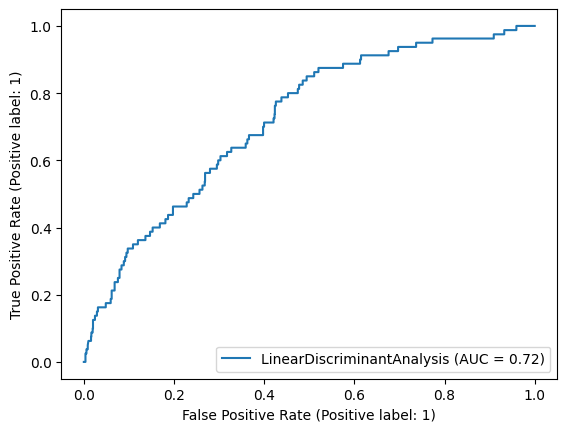

In [19]:
plot_roc_curve(lda, X_test_pca_5, y_test)

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca_2, y_res)
y_pred = lda.predict(X_test_pca_2)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77      1376
           1       0.08      0.54      0.14        80

    accuracy                           0.63      1456
   macro avg       0.52      0.59      0.45      1456
weighted avg       0.91      0.63      0.73      1456



In [53]:
rd = RidgeClassifierCV()
rd.fit(X_train_pca_5, y_res)
y_pred = rd.predict(X_test_pca_5)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75      1374
           1       0.10      0.68      0.17        82

    accuracy                           0.62      1456
   macro avg       0.53      0.65      0.46      1456
weighted avg       0.92      0.62      0.72      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


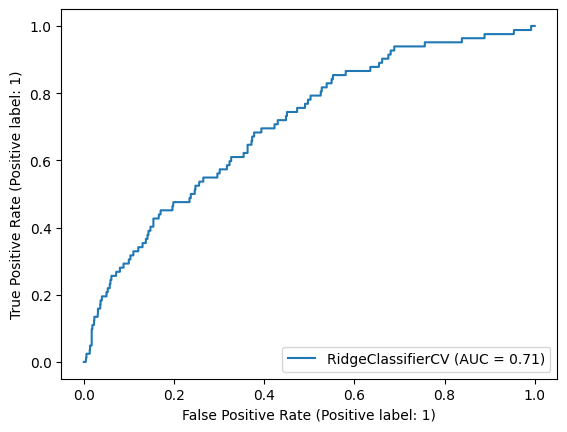

In [57]:
plot_roc_curve(rd, X_test_pca_5, y_test)

# CONCLUSION

- Survey different models with 40 important variables, these features but apply pca and remain 10 or 5 components.
- Results: Models build with Orginal 40 variables has high accuracy (about 91-96%) and precision (class 1 - about 0.26% LinearDiscriminantAnalysis) but recall and f1 score to predict class 1 is very low (<0.1%) and AUC<0.65. Because present covariate correlation in the dataset, so after perform PCA, although accuracy of models reduce (from ~0.93 to 0.63, precision down from 0.26 (LinearDiscriminantAnalysis) and 0.12 (other models) to 0.1, recall and precision increase significantly from <0.1% to 0.69% (class 1).

Best Models
1. LinearDiscriminantAnalysis with 40 variables 0.26 precision of class 1 and 0.94 accuracy, auc 0.66
2. SCV with PCA (5 components) - 0.62 (recall) , 0.17 (f1 score),  0.65 (accuracy) - 0.71 (AUC)
3. LR with PCA (5 components)  - 0.67 (recall), 0.18 (recall), 0.64 (accuracy)- 0.72 (AUC)
4. LinearDiscriminantAnalysis with PCA (5 components) 0.69 (recall),  0.18 - 0.63 (accuracy), 0.72 (AUC)
5. RidgeClassifierCV with PCA (5 components) 0.69 (recall), 0.18 (f1 score) - 0.63 (accuracy),  0.72 (AUC)

We will use model No. 1 and 5 to predict testset

# APPLY FOR TEST DATASET PREDICTION

In [38]:
testset = pd.read_csv('test_data.txt', sep=',')

In [39]:
testset

,ID,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1,33,1,4,2,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
1,2,6,1,3,2,2,0,5,0,4,...,2,0,0,0,1,0,0,0,0,0
2,3,39,1,3,3,9,1,4,2,3,...,1,0,0,0,1,0,0,0,0,0
3,4,9,1,2,3,3,2,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,5,31,1,2,4,7,0,2,0,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,33,1,2,4,8,0,7,2,0,...,0,0,0,0,1,0,0,0,0,0
3996,3997,24,1,2,3,5,1,5,1,3,...,1,0,0,0,1,0,0,0,0,0
3997,3998,36,1,2,3,8,1,5,1,3,...,0,0,0,0,1,0,0,0,1,0
3998,3999,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


In [40]:
columns = ['ID','Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic', 'Protestant', 'Other relition', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles', 'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status', 'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A', 'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars', 'No car', 'National Health Service', 'Private health insurance', 'Income 30.000', 'Income 30-45.000', 'Income 45-75.000', 'Income 75-122.000', 'Income>123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance (firms)', 'Contribution third party insurance (agriculture)', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies', 'Contribution tractor polities', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances',  'Contribution private accident insurance policies', 'Contribution family accidents insurance policies', 'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies', 'Contribution social security insurance policies', 'Number of private third party insurance', 'Number of third party insurance (firms)', 'Number of third party insurance (agriculture)', 'Number of car policies', 'Number of delivery van policies', 'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'Number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies', 'Number of life insurances', 'Number of private accident insurance policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies', 'Number of fire policies','Number of surfboard policies', 'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies']

In [41]:
testset.columns=columns

In [42]:
# pca_5 = PCA(n_components=5)
# X_train_pca_5 = pca.fit_transform(X_res)
X_test_pca_5 = pca.transform(testset.iloc[:,1:])
X_test_raw = testset[selected_feat]

## Model No. 1

In [71]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_res[selected_feat], y_res)
y_pred = lda.predict(X_test_raw)
y_proba = lda.predict_proba(X_test_raw)
results = pd.DataFrame({'Target':y_pred, "Probability":y_proba[:,1]})
results.sort_values(by=['Target', 'Probability'], ascending=[False, False], inplace=True)
results.to_csv('Task_1 Predict Results/Model_1_LinearDiscriminantAnalysis_wt_PCA_all.csv')
results.head(800).to_csv('Task_1 Predict Results/Model_1_LinearDiscriminantAnalysis_wt_PCA_first_800.csv')

## Model No. 2

In [54]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca_5, y_res)
y_pred = lda.predict(X_test_pca_5)
y_proba = lda.predict_proba(X_test_pca_5)
results = pd.DataFrame({'Target':y_pred, "Probability":y_proba[:,1]})
results.sort_values(by=['Target', 'Probability'], ascending=[False, False], inplace=True)
results.to_csv('Task_1 Predict Results/Model_1_LinearDiscriminantAnalysis_w_PCA_all.csv')
results.head(800).to_csv('Task_1 Predict Results/Model_1_LinearDiscriminantAnalysis_w_PCA_first_800.csv')

## Model No.3 

In [44]:
lr_5 = LogisticRegression()
lr_5.fit(X_train_pca_5, y_res)
y_pred = lr_5.predict(X_test_pca_5)
# svc = SVC()
# svc.fit(X_train_pca, y_res)
# y_pred = svc.predict(X_test_pca)
y_proba = lr_5.predict_proba(X_test_pca_5)
results = pd.DataFrame({'Target':y_pred, "Probability":y_proba[:,1]})
results.sort_values(by=['Target', 'Probability'], ascending=[False, False], inplace=True)
results.to_csv('Task_1 Predict Results/Model_1_LR_w_PCA_all.csv')
results.head(800).to_csv('Task_1 Predict Results/Model_1_LR_w_PCA_all_first_800.csv')

ValueError: X has 25 features, but LogisticRegression is expecting 5 features as input.

In above 3 models, the last second models (2 and 3) preidct with highest number of class 1 582 and 568 cases

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [56]:
fpr, tpr,thresholds

(array([0.        , 0.38064047, 1.        ]),
 array([0.        , 0.74390244, 1.        ]),
 array([2, 1, 0], dtype=int64))

Best Threshold=1.000000, G-Mean=0.679


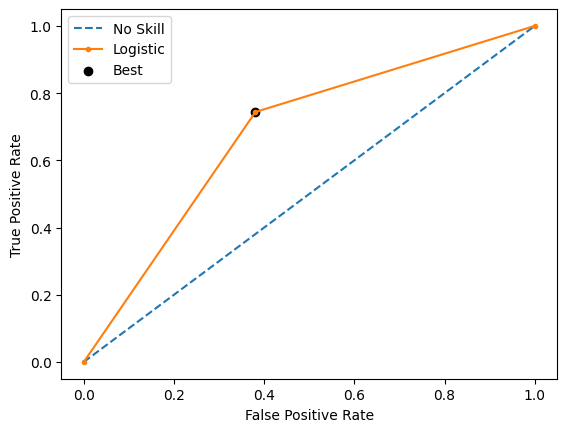

In [57]:
from numpy import *
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [60]:
probs = lr_5.predict_proba(X_test_pca_5)[:,1]
thresholds = arange(0, 1, 0.001)
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
     return (pos_probs >= threshold).astype('int')
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.739, F-Score=0.23711


In [63]:
results['New_labels'] = results.Probability.apply(lambda x: 1 if x>0.739 else 0)

In [67]:
pd.set_option('display.max_row', None)

In [68]:
results

,Target,Probability,New_labels
126,1,0.874125,1
665,1,0.859448,1
1155,1,0.854116,1
1331,1,0.849473,1
1365,1,0.840345,1
106,1,0.839948,1
464,1,0.837755,1
441,1,0.836272,1
473,1,0.835164,1
644,1,0.833987,1
